In [57]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 6GB Laptop GPU
Using device: cuda


In [58]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn

In [121]:
fake = pd.read_csv("dataset/Fake.csv")
real = pd.read_csv("dataset/True.csv")

In [122]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [92]:
real.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [93]:
fake.tail()

,title,text,subject,date,Target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [95]:
real.tail()

,title,text,subject,date,Target
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [120]:
fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [97]:
real["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [123]:
fake["Target"] = 1
real["Target"] = 0 

In [99]:
real.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [100]:
fake.head()

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [124]:
df=pd.concat([fake,real]).reset_index(drop=True)

In [102]:
df.tail()

,title,text,subject,date,Target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count of Fake and Real News')

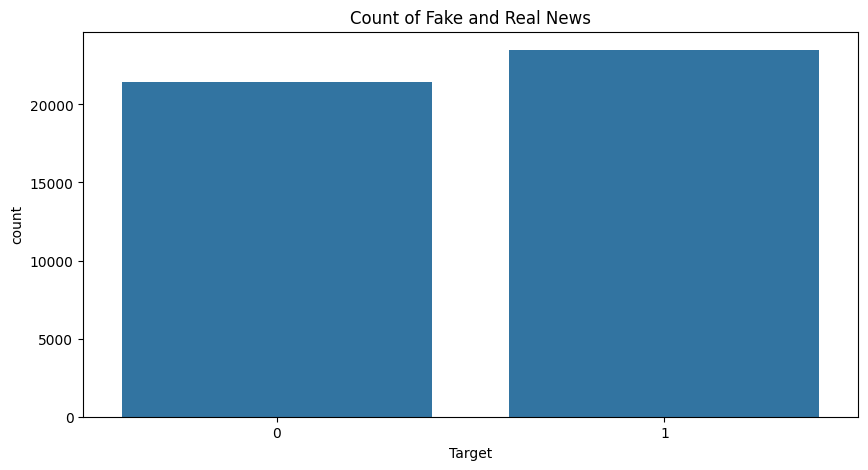

In [125]:
fig = plt.figure(figsize=(10, 5))
graph = sns.countplot(x="Target", data=df)
plt.title("Count of Fake and Real News")

Text(0.5, 1.0, 'Count of Subject')

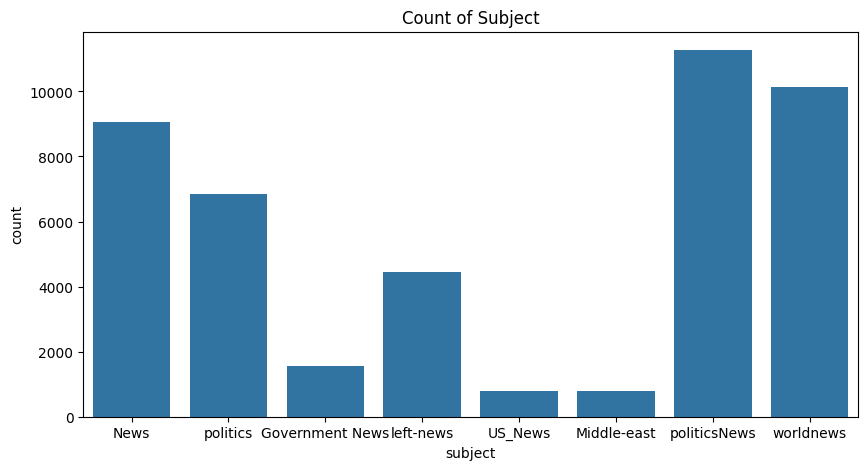

In [126]:
fig = plt.figure(figsize=(10, 5))
graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subject")

# Data cleaning

In [127]:
df.isna().sum()

title      0
text       0
subject    0
date       0
Target     0
dtype: int64

In [128]:
blanks=[]
for index,text in df["text"].items(): 
    if text.isspace(): 
        blanks.append(index)

print(len(blanks))
blanks

631


[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [129]:
print(df.iloc[21873])

title      (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...
text                                                        
subject                                            left-news
date                                            Apr 12, 2015
Target                                                     1
Name: 21873, dtype: object


In [133]:
df["text"] =df["title"]+df["text"]
df=df[["text","Target"]]

In [134]:
df.head()

,text,Target
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


In [135]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

In [136]:
nlp=spacy.load("en_core_web_sm")

lemma=WordNetLemmatizer()

In [137]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
list1=nlp.Defaults.stop_words
print(len(list1))

list2=stopwords.words('english')
print(len(list2))

Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [139]:
def clean_text(text):

    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [140]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [141]:
df["text"]=df["text"].apply(clean_text)  

# Word Cloud


In [142]:
from wordcloud import WordCloud

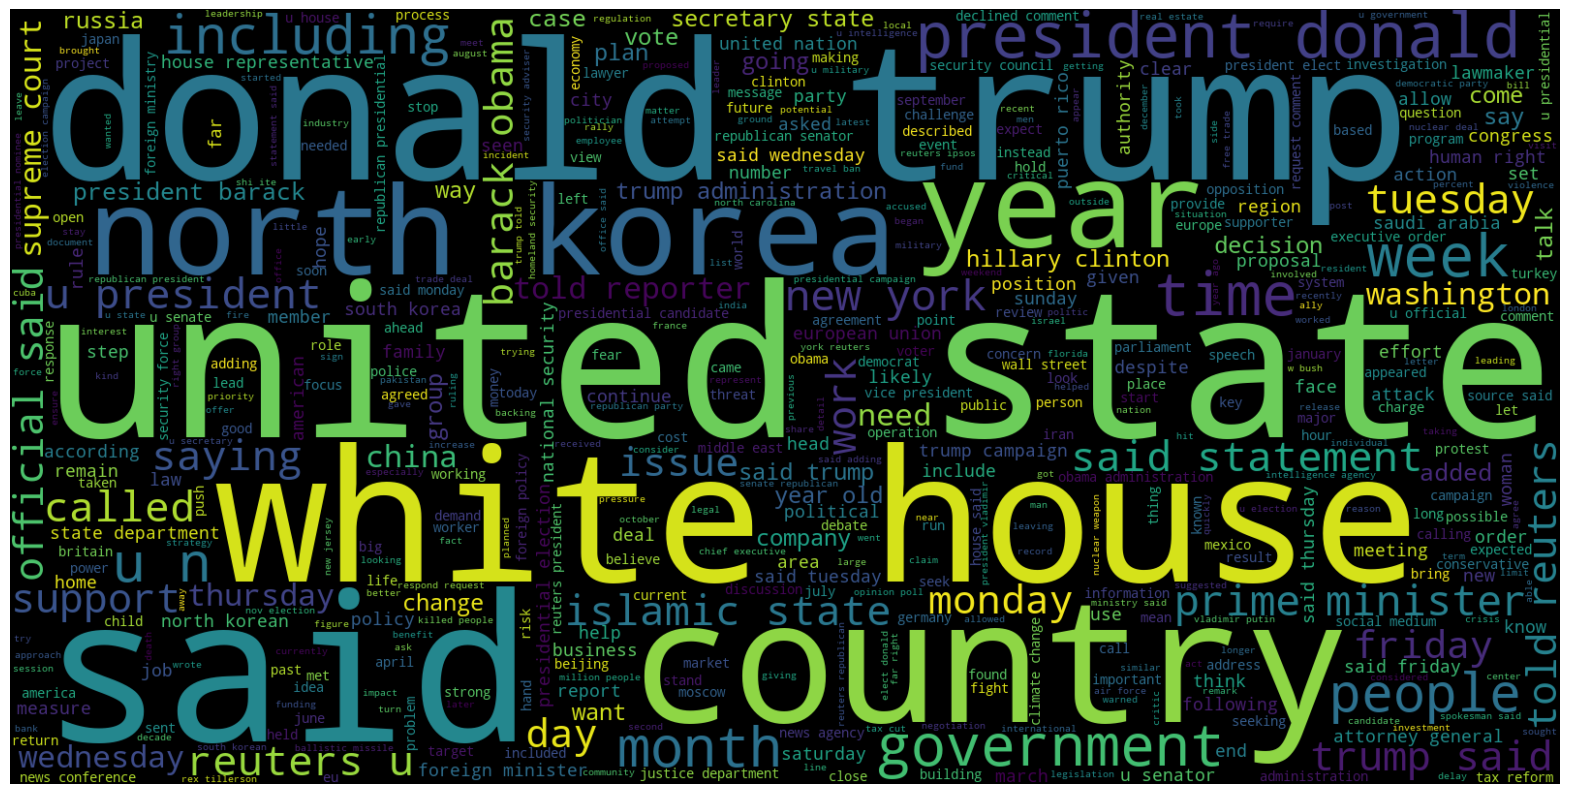

In [143]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.Target == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [144]:
from PIL import Image

In [148]:
smiley="images/happy.png"
icon=Image.open(smiley)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

In [150]:
rgb_array=np.array(mask)

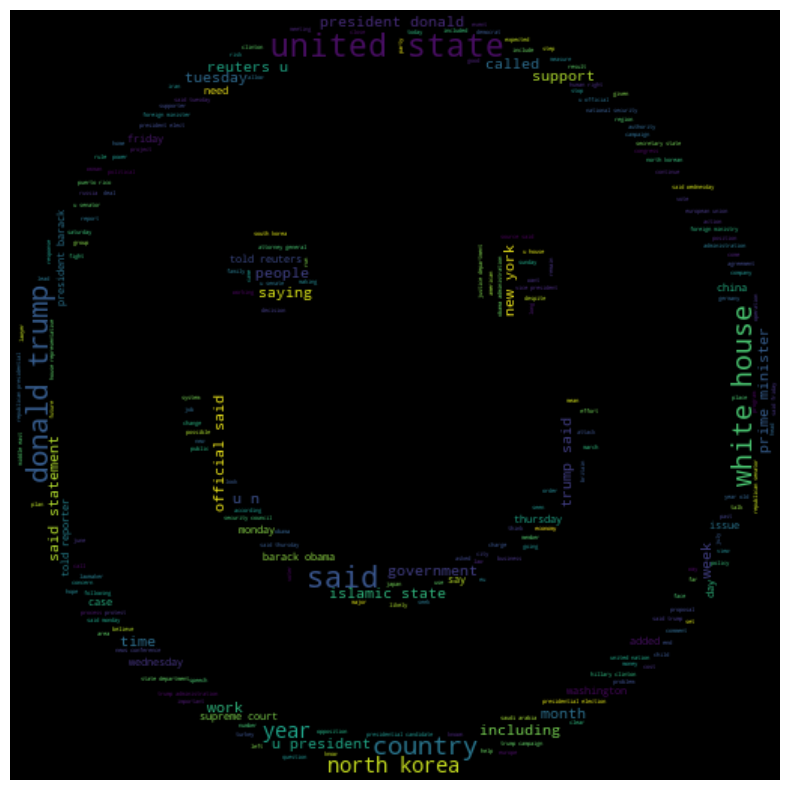

In [151]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.Target == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [40]:
smiley1="images/sad-face.png"
icon=Image.open(smiley1)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

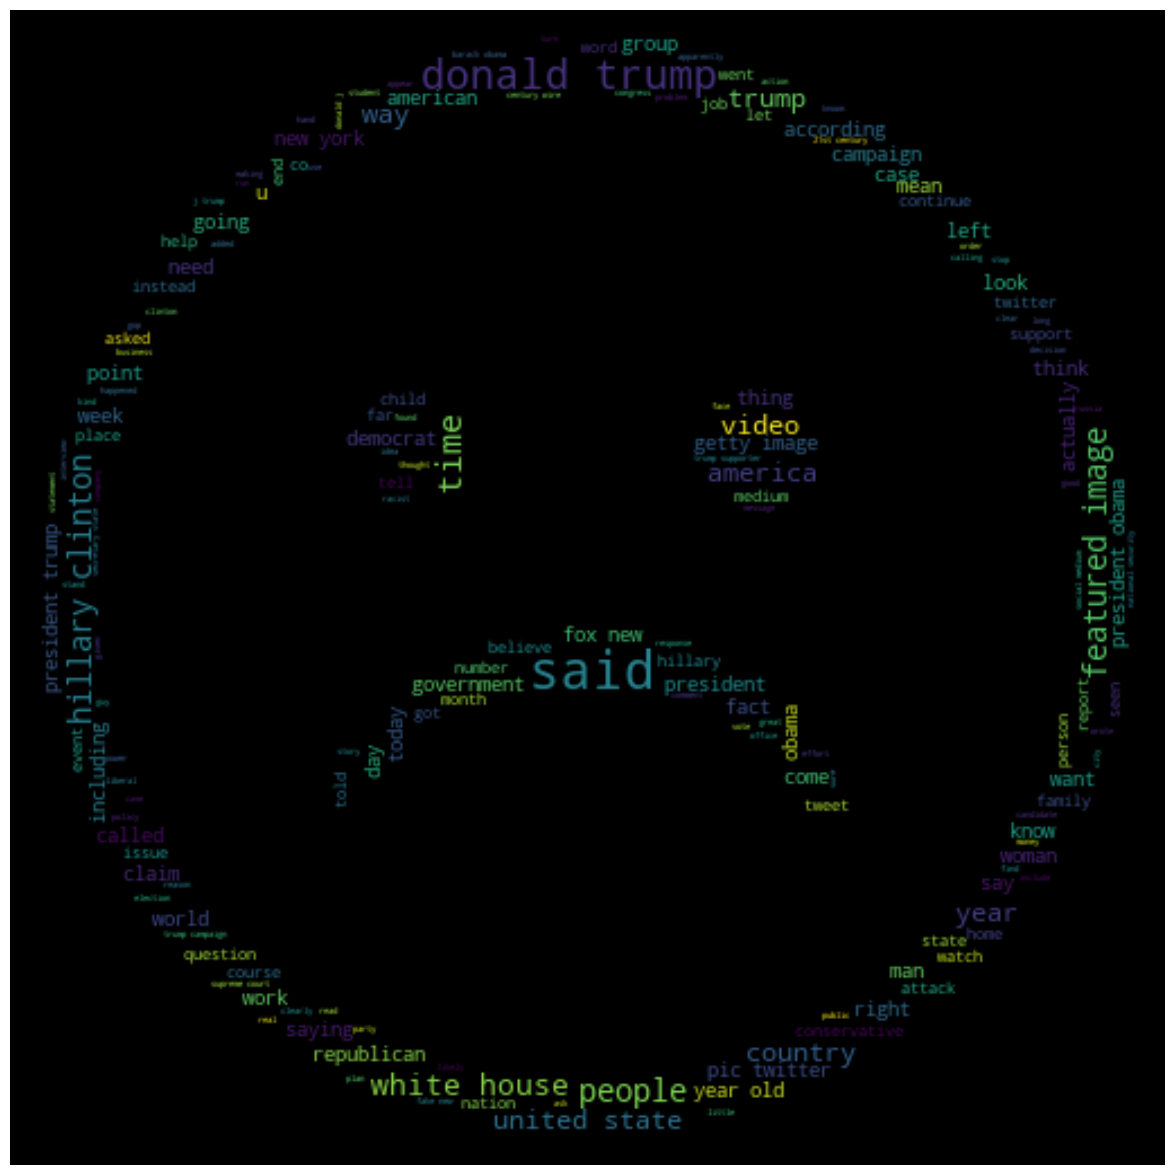

In [ ]:
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.Target == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

# Model building


In [42]:
from sklearn.model_selection import train_test_split


X=df["text"] #feature 
y=df["Target"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [45]:
predictions=text_clf.predict(X_test)

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7039
           1       0.99      0.99      0.99      7778

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



# Acuracy

In [47]:
print(metrics.accuracy_score(y_test,predictions))

0.9935884457042586


In [48]:
con_f=metrics.confusion_matrix(y_test,predictions)
print(con_f)

[[6997   42]
 [  53 7725]]


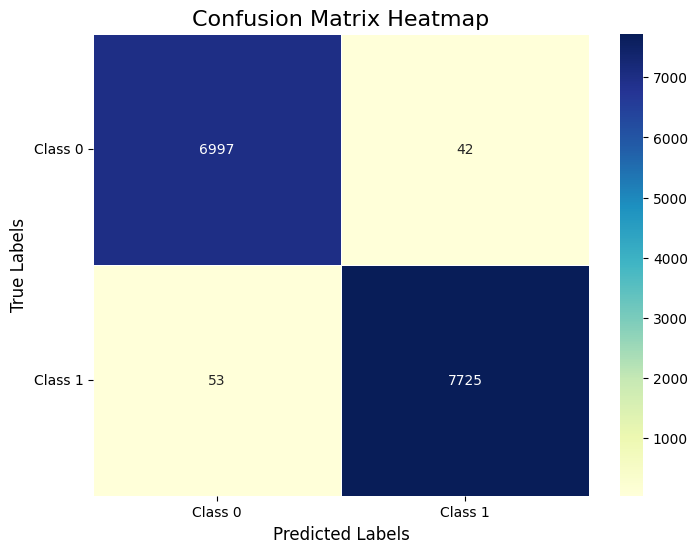

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(con_f, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)

plt.title("Confusion Matrix Heatmap", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

plt.xticks(ticks=[0.5, 1.5], labels=["Class 0", "Class 1"], fontsize=10)
plt.yticks(ticks=[0.5, 1.5], labels=["Class 0", "Class 1"], fontsize=10, rotation=0)

plt.show()


In [ ]:
import joblib

joblib.dump(text_clf, "fake_news_classifier_pipeline.pkl")


['fake_news_classifier_pipeline.pkl']

In [51]:

text_clf = joblib.load("fake_news_classifier_pipeline.pkl")


In [52]:
new_article = ["Breaking news: New technology revolutionizes AI."]
prediction = text_clf.predict(new_article)

if prediction[0] == 0:  # Assuming 0 is Real, 1 is Fake
    print("The article is Real News.")
else:
    print("The article is Fake News.")


The article is Fake News.
